In [176]:
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
import numpy as np

In [178]:
np.random.seed(123)

In [179]:
df = pd.read_csv('./data/ControllerData.csv')

In [180]:
df.sample(10)

,x,y,rx,ry,type
270,-0.003234,0.021948,-0.575342,-0.003023,0
24,-0.037526,0.015475,-0.501838,-0.030393,0
188,-0.000506,0.028098,-0.539836,-0.014257,0
163,0.045718,0.020007,0.012991,0.050431,1
147,0.032525,0.010113,0.025831,0.064753,1
128,0.002410,0.022192,-0.577196,-0.005405,0
259,0.030994,0.019069,0.054020,0.042111,1
132,0.005813,0.017031,-0.593173,-0.004208,0
245,0.036917,0.017354,0.050302,0.050770,1
36,0.001140,0.030495,-0.653582,0.002616,0


In [183]:
df.dropna(axis=0, how='any')

,x,y,rx,ry,type
0,-0.089599,-0.250967,0.012570,0.012499,0
2,-0.088460,-0.250309,0.012045,0.011567,0
3,-0.034180,-0.181214,-0.032822,-0.068101,1
4,-0.016122,0.014567,-0.547088,-0.063055,0
5,0.110486,0.034747,0.390523,0.152115,1
...,...,...,...,...,...
277,0.024794,0.019779,0.040753,0.039415,1
278,-0.003201,0.024041,-0.588627,0.000555,0
279,0.024230,0.015094,0.044455,0.042783,1
280,-0.003154,0.024037,-0.587692,0.000588,0


In [184]:
df1 = df.copy()

In [202]:
df1 = df1.round(4)

In [203]:
df1 = df1.dropna(axis=0, how='any')


In [205]:
data_1 = df1.loc[df1['type'] == 1]
data_2 = df1.loc[df1['type'] == 0]
data_2.sample(20)

,x,y,rx,ry,type
176,0.0012,0.0227,-0.5445,-0.0100,0
2,-0.0885,-0.2503,0.0120,0.0116,0
150,0.0020,0.0182,-0.5653,-0.0074,0
214,-0.0011,0.0297,-0.5490,-0.0107,0
224,-0.0018,0.0294,-0.5562,-0.0150,0
70,-0.0040,0.0285,-0.5852,0.0006,0
138,0.0040,0.0166,-0.5692,-0.0042,0
166,0.0029,0.0238,-0.5539,-0.0093,0
230,-0.0023,0.0303,-0.5621,-0.0167,0
112,-0.0012,0.0198,-0.5850,0.0011,0


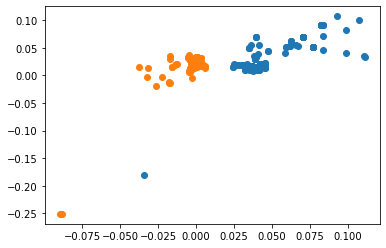

In [206]:
X_data_1 = pd.DataFrame(data_1, columns=['x'])
Y_data_1 = pd.DataFrame(data_1, columns=['y'])
X_data_2 = pd.DataFrame(data_2, columns=['x'])
Y_data_2 = pd.DataFrame(data_2, columns=['y'])
plt.scatter(X_data_1, Y_data_1)
plt.scatter(X_data_2, Y_data_2)
plt.show()

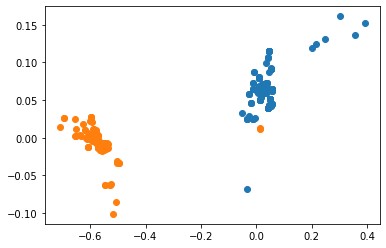

In [207]:
RX_data_1 = pd.DataFrame(data_1, columns=['rx'])
RY_data_1 = pd.DataFrame(data_1, columns=['ry'])
RX_data_2 = pd.DataFrame(data_2, columns=['rx'])
RY_data_2 = pd.DataFrame(data_2, columns=['ry'])
plt.scatter(RX_data_1, RY_data_1)
plt.scatter(RX_data_2, RY_data_2)
plt.show()

In [208]:
df_X = df1.loc[:, ['x', 'y', 'rx', 'ry']]
df_y = df1.type

In [209]:
df_y

0      0
2      0
3      1
4      0
5      1
      ..
277    1
278    0
279    1
280    0
281    1
Name: type, Length: 281, dtype: int64

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=123)

In [233]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [235]:
log_reg.score(X_train, y_train)

0.9904761904761905

In [236]:
log_reg.score(X_test, y_test)

1.0

In [237]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
  return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression())
  ])

In [238]:
poly_log_reg = PolynomialLogisticRegression(degree=3)

In [239]:
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('log_reg', LogisticRegression())])

In [240]:
poly_log_reg.score(X_train, y_train)

0.9904761904761905

In [241]:
poly_log_reg.score(X_test, y_test)

1.0

In [229]:
plot_decision_boundary(poly_log_reg, axis=[-2,2,-2,2])

ValueError: X has 2 features, but PolynomialFeatures is expecting 4 features as input.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(258, 2)
(258,)
